In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
DATA_PATH = r"C:\Users\abenech\Downloads\donnees_hopital.csv"

df = pd.read_csv(DATA_PATH, sep=";", encoding="utf-8")
print(df.shape)
df.head()

(2192, 29)


,date,dow,month,day_of_week,season,temperature_c,heatwave_event,epidemic_level,strike_level,accident_event,...,scheduled_surgeries,avg_patient_severity,staff_absence_rate,bed_occupancy_rate,ambulance_arrivals,external_alert_level,supply_delivery_day,it_system_outage,estimated_cost_per_day,patient_satisfaction_score
0,01/01/2023,6,1,Sunday,winter,12.0,0,0,0,0,...,46,2.3,0.07,0.438,100,0,0,0,61080,7.63
1,02/01/2023,0,1,Monday,winter,8.0,0,2,0,0,...,30,3.1,0.11,0.592,174,1,0,0,72960,6.58
2,03/01/2023,1,1,Tuesday,winter,3.2,0,0,0,0,...,47,2.3,0.07,0.498,110,0,1,0,67860,7.55
3,04/01/2023,2,1,Wednesday,winter,9.2,0,3,0,0,...,17,3.5,0.13,0.630,143,2,0,0,73140,5.98
4,05/01/2023,3,1,Thursday,winter,10.6,0,3,0,0,...,17,3.5,0.13,0.544,149,2,1,0,63900,6.00


In [5]:
display(df.info())

# Manquants par colonne
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Doublons
print("Doublons:", df.duplicated().sum())

# Aperçu stats numériques
display(df.describe(include="number").T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         2192 non-null   object 
 1   dow                          2192 non-null   int64  
 2   month                        2192 non-null   int64  
 3   day_of_week                  2192 non-null   object 
 4   season                       2192 non-null   object 
 5   temperature_c                2192 non-null   float64
 6   heatwave_event               2192 non-null   int64  
 7   epidemic_level               2192 non-null   int64  
 8   strike_level                 2192 non-null   int64  
 9   accident_event               2192 non-null   int64  
 10  total_admissions             2192 non-null   int64  
 11  emergency_admissions         2192 non-null   int64  
 12  pediatric_admissions         2192 non-null   int64  
 13  icu_admissions    

None

Series([], dtype: int64)

Doublons: 0


,count,mean,std,min,25%,50%,75%,max
dow,2192.0,2.997263,2.002051,0.000,1.000,3.000,5.000,6.000
month,2192.0,6.521898,3.449773,1.000,4.000,7.000,10.000,12.000
temperature_c,2192.0,11.993978,7.867649,-5.400,5.200,12.150,18.700,29.800
heatwave_event,2192.0,0.019617,0.138711,0.000,0.000,0.000,0.000,1.000
epidemic_level,2192.0,0.539234,0.775193,0.000,0.000,0.000,1.000,3.000
strike_level,2192.0,0.005931,0.076800,0.000,0.000,0.000,0.000,1.000
accident_event,2192.0,0.003650,0.060316,0.000,0.000,0.000,0.000,1.000
total_admissions,2192.0,403.573449,55.236309,285.000,363.000,394.000,437.000,623.000
emergency_admissions,2192.0,193.657847,40.930859,128.000,164.000,181.500,215.000,373.000
pediatric_admissions,2192.0,45.713504,14.731680,28.000,36.000,39.000,52.000,93.000


In [6]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y", errors="coerce")

# Si jamais des dates ont échoué
print("Dates invalides:", df["date"].isna().sum())

df = df.sort_values("date").reset_index(drop=True)
df.head()


Dates invalides: 0


,date,dow,month,day_of_week,season,temperature_c,heatwave_event,epidemic_level,strike_level,accident_event,...,scheduled_surgeries,avg_patient_severity,staff_absence_rate,bed_occupancy_rate,ambulance_arrivals,external_alert_level,supply_delivery_day,it_system_outage,estimated_cost_per_day,patient_satisfaction_score
0,2023-01-01,6,1,Sunday,winter,12.0,0,0,0,0,...,46,2.3,0.07,0.438,100,0,0,0,61080,7.63
1,2023-01-01,6,1,Sunday,winter,12.0,0,2,0,0,...,27,3.1,0.11,0.574,168,1,0,0,70140,6.63
2,2023-01-02,0,1,Monday,winter,8.0,0,2,0,0,...,30,3.1,0.11,0.607,145,1,0,0,74520,6.75
3,2023-01-02,0,1,Monday,winter,8.0,0,2,0,0,...,30,3.1,0.11,0.592,174,1,0,0,72960,6.58
4,2023-01-03,1,1,Tuesday,winter,3.2,0,0,0,0,...,47,2.3,0.07,0.498,110,0,1,0,67860,7.55


In [7]:
# Catégorielles (selon ton CSV)
cat_cols = ["day_of_week", "season"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Booléens (0/1) -> int
bool_like = [
    "heatwave_event", "accident_event", "supply_delivery_day", "it_system_outage"
]
for c in bool_like:
    if c in df.columns:
        df[c] = df[c].astype("Int64")  # accepte NA

df.dtypes


date                           datetime64[ns]
dow                                     int64
month                                   int64
day_of_week                          category
season                               category
temperature_c                         float64
heatwave_event                          Int64
epidemic_level                          int64
strike_level                            int64
accident_event                          Int64
total_admissions                        int64
emergency_admissions                    int64
pediatric_admissions                    int64
icu_admissions                          int64
available_beds                          int64
available_staff                         int64
medical_stock_level_pct               float64
waiting_time_avg_min                    int64
naive_pred_total_admissions             int64
scheduled_surgeries                     int64
avg_patient_severity                  float64
staff_absence_rate                

In [8]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dow"] = df["date"].dt.dayofweek  # lundi=0
df["week"] = df["date"].dt.isocalendar().week.astype(int)
df["is_weekend"] = (df["dow"] >= 5).astype(int)

df[["date","year","month","dow","week","is_weekend"]].head()


,date,year,month,dow,week,is_weekend
0,2023-01-01,2023,1,6,52,1
1,2023-01-01,2023,1,6,52,1
2,2023-01-02,2023,1,0,1,0
3,2023-01-02,2023,1,0,1,0
4,2023-01-03,2023,1,1,1,0


In [9]:
TARGET = "total_admissions"

assert TARGET in df.columns, f"Colonne cible '{TARGET}' introuvable."
display(df[[ "date", TARGET ]].head())


,date,total_admissions
0,2023-01-01,394
1,2023-01-01,517
2,2023-01-02,546
3,2023-01-02,533
4,2023-01-03,448


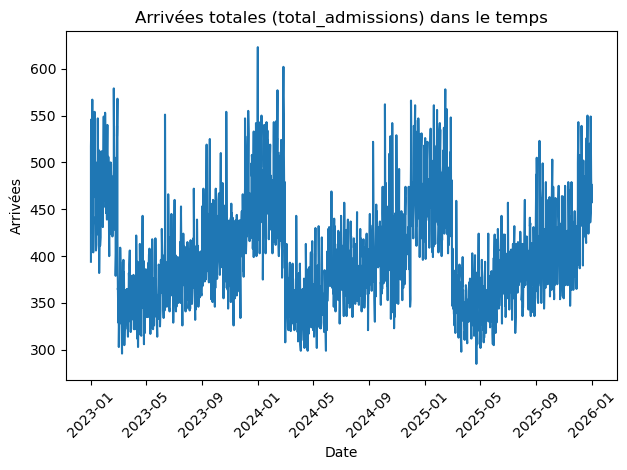

In [10]:
plt.figure()
plt.plot(df["date"], df[TARGET])
plt.title("Arrivées totales (total_admissions) dans le temps")
plt.xlabel("Date")
plt.ylabel("Arrivées")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


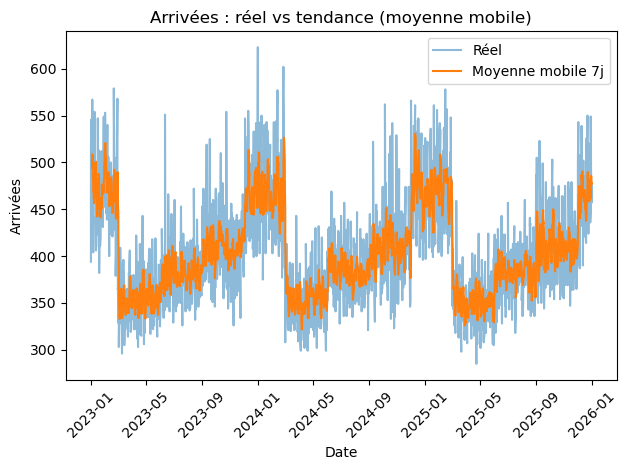

In [11]:
window = 7  # 7 jours
rolling = df[TARGET].rolling(window=window).mean()

plt.figure()
plt.plot(df["date"], df[TARGET], alpha=0.5, label="Réel")
plt.plot(df["date"], rolling, label=f"Moyenne mobile {window}j")
plt.title("Arrivées : réel vs tendance (moyenne mobile)")
plt.xlabel("Date")
plt.ylabel("Arrivées")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


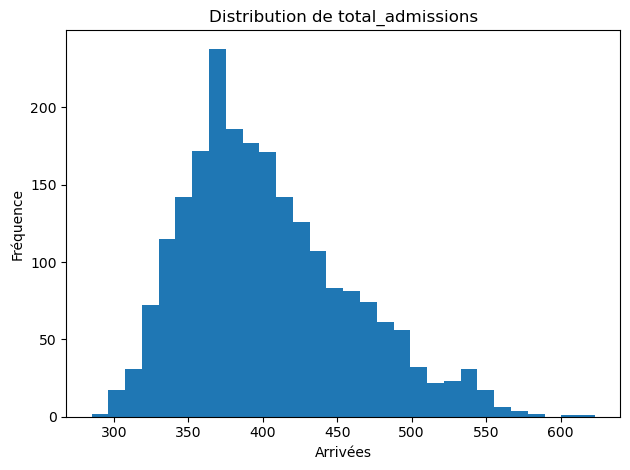

In [14]:
plt.figure()
plt.hist(df[TARGET].dropna(), bins=30)
plt.title("Distribution de total_admissions")
plt.xlabel("Arrivées")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()




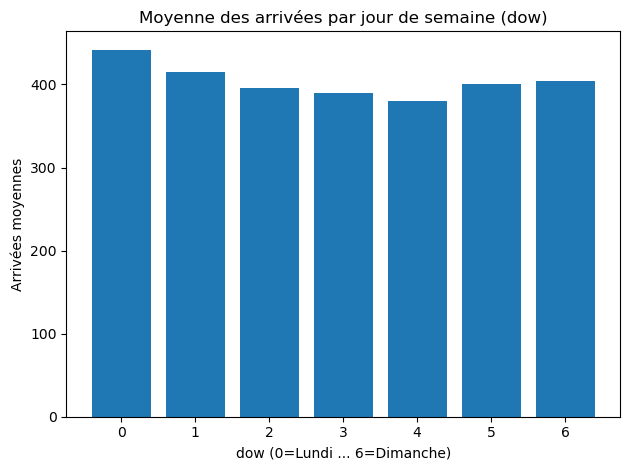

In [15]:
g = df.groupby("dow")[TARGET].mean()

plt.figure()
plt.bar(g.index.astype(str), g.values)
plt.title("Moyenne des arrivées par jour de semaine (dow)")
plt.xlabel("dow (0=Lundi ... 6=Dimanche)")
plt.ylabel("Arrivées moyennes")
plt.tight_layout()
plt.show()


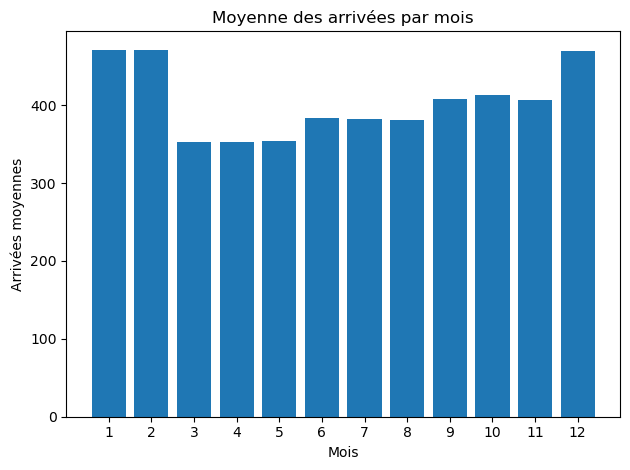

In [16]:
g = df.groupby("month")[TARGET].mean()

plt.figure()
plt.bar(g.index.astype(str), g.values)
plt.title("Moyenne des arrivées par mois")
plt.xlabel("Mois")
plt.ylabel("Arrivées moyennes")
plt.tight_layout()
plt.show()


C:\Users\abenech\AppData\Local\Temp\ipykernel_8572\2855802777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby("season")[TARGET].mean().sort_values()


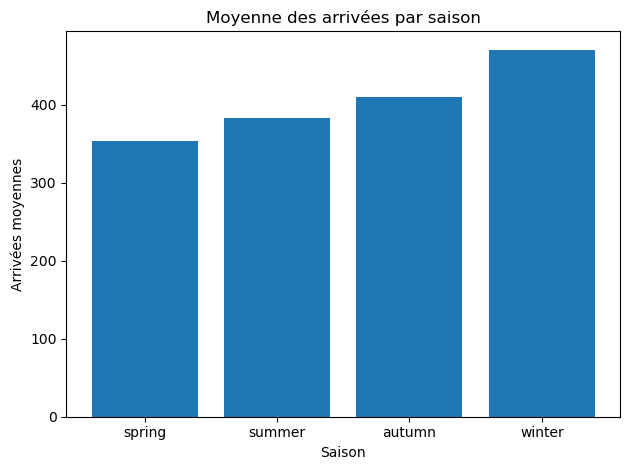

In [17]:
if "season" in df.columns:
    g = df.groupby("season")[TARGET].mean().sort_values()

    plt.figure()
    plt.bar(g.index.astype(str), g.values)
    plt.title("Moyenne des arrivées par saison")
    plt.xlabel("Saison")
    plt.ylabel("Arrivées moyennes")
    plt.tight_layout()
    plt.show()


In [18]:
num_df = df.select_dtypes(include=["number"]).copy()
corr = num_df.corr(numeric_only=True)[TARGET].sort_values(ascending=False)

display(corr)


total_admissions               1.000000
bed_occupancy_rate             0.999989
emergency_admissions           0.951315
estimated_cost_per_day         0.947241
pediatric_admissions           0.881674
icu_admissions                 0.857895
ambulance_arrivals             0.826057
staff_absence_rate             0.815493
naive_pred_total_admissions    0.789234
avg_patient_severity           0.702967
epidemic_level                 0.696248
waiting_time_avg_min           0.581173
external_alert_level           0.576223
accident_event                 0.126639
month                          0.050445
temperature_c                  0.040914
week                           0.036048
year                          -0.006620
it_system_outage              -0.009110
is_weekend                    -0.017923
supply_delivery_day           -0.020081
heatwave_event                -0.026190
day                           -0.028026
strike_level                  -0.051262
dow                           -0.205740


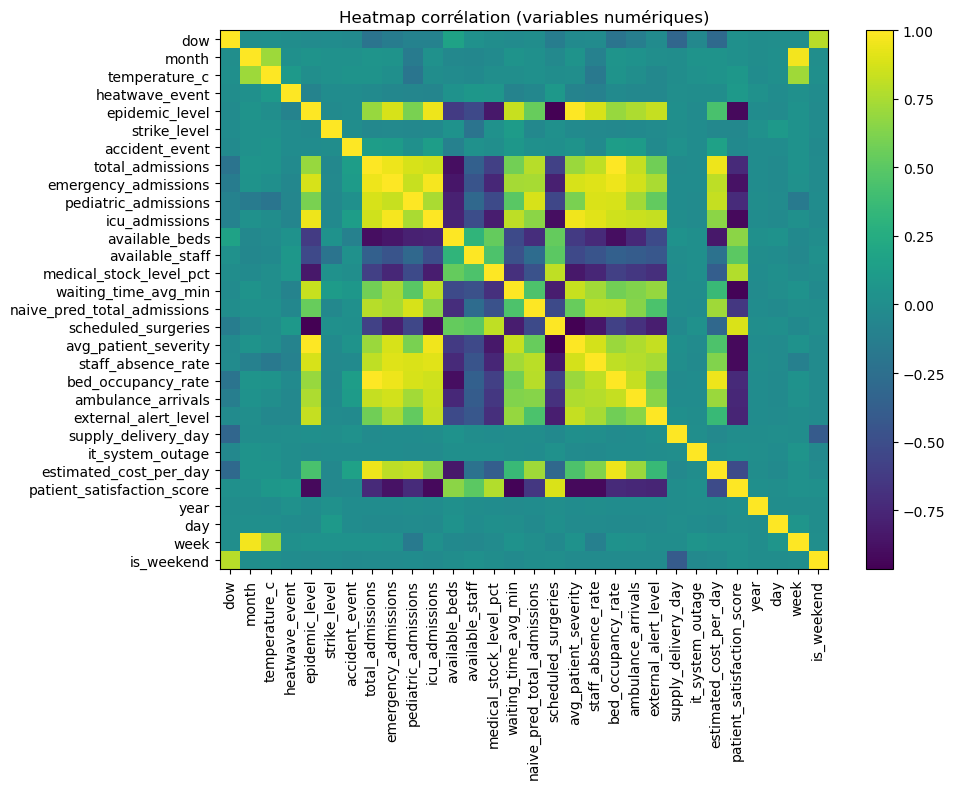

In [19]:
# Corr sur variables numériques uniquement
corr_matrix = num_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect="auto")
plt.title("Heatmap corrélation (variables numériques)")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.colorbar()
plt.tight_layout()
plt.show()


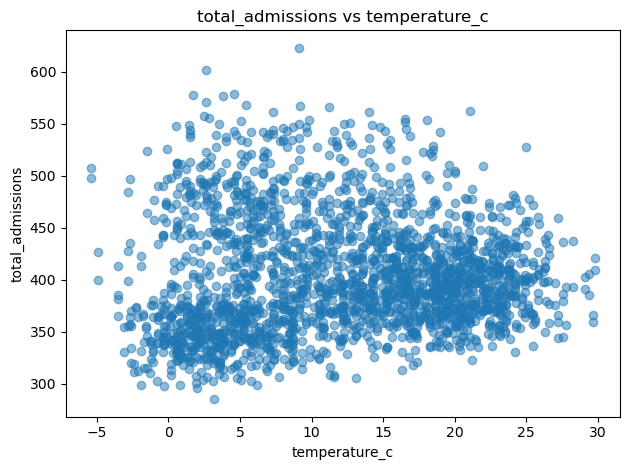

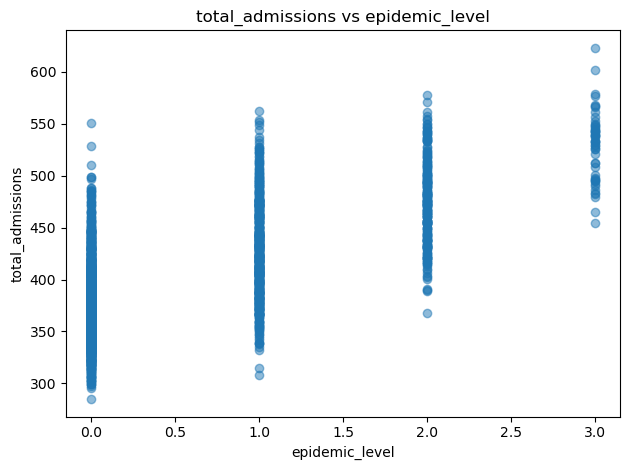

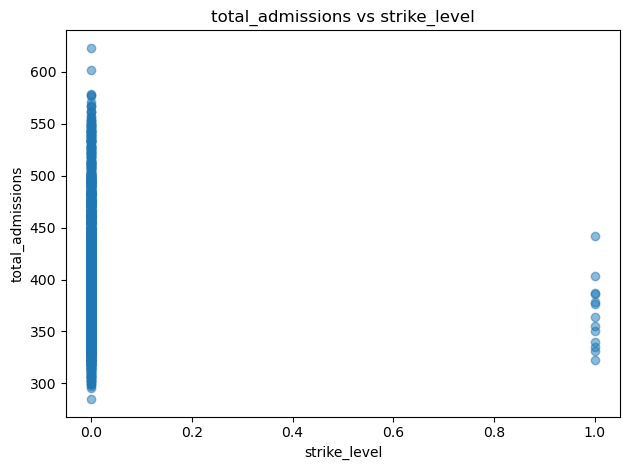

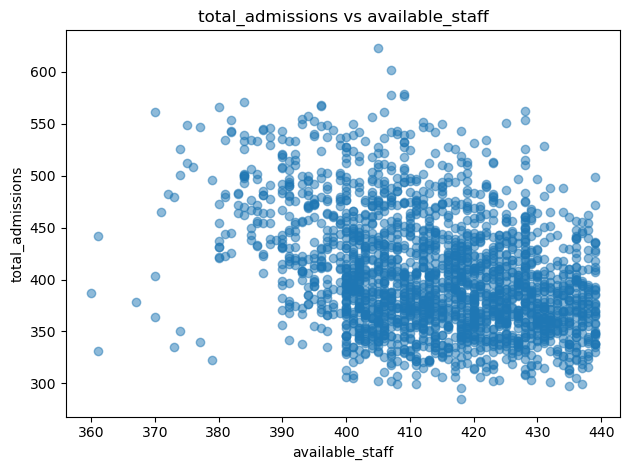

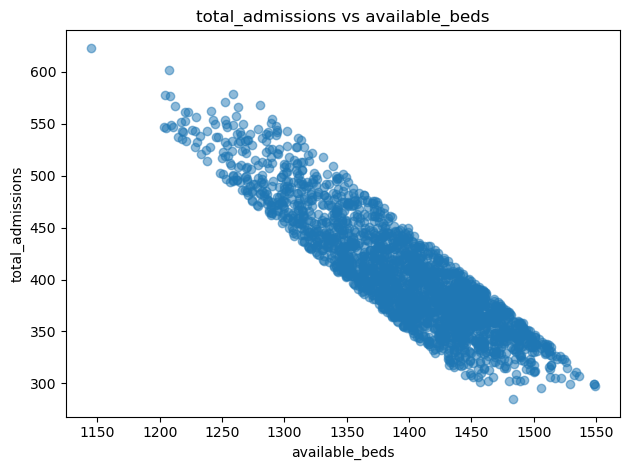

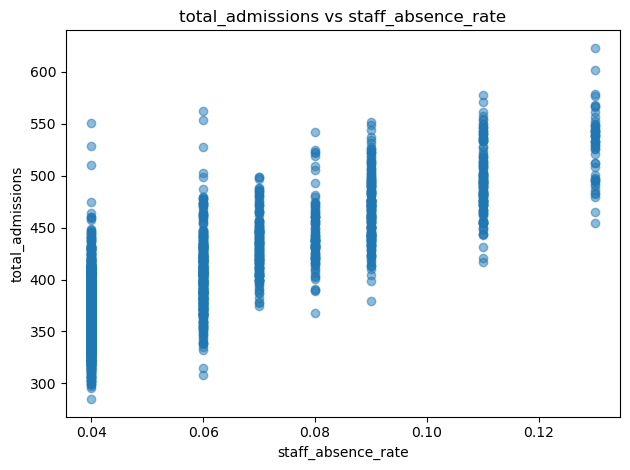

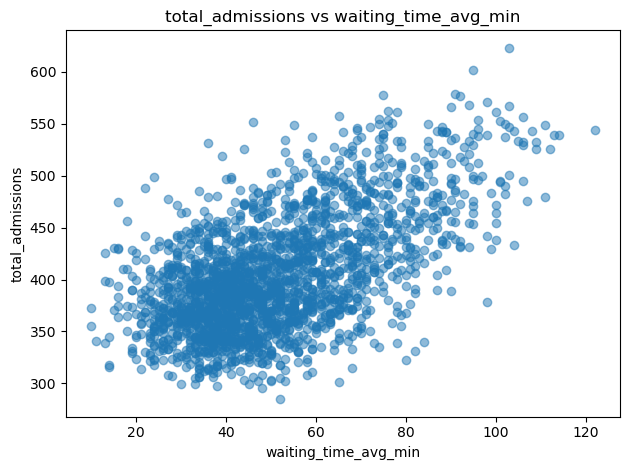

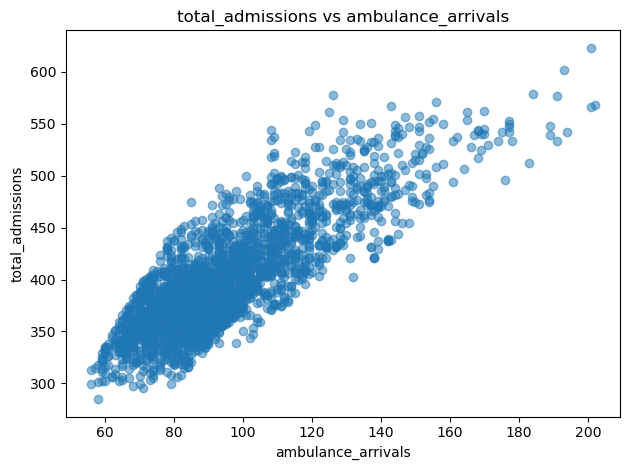

In [20]:
candidates = [
    "temperature_c", "epidemic_level", "strike_level",
    "available_staff", "available_beds", "staff_absence_rate",
    "waiting_time_avg_min", "ambulance_arrivals"
]

for c in candidates:
    if c in df.columns:
        plt.figure()
        plt.scatter(df[c], df[TARGET], alpha=0.5)
        plt.title(f"{TARGET} vs {c}")
        plt.xlabel(c)
        plt.ylabel(TARGET)
        plt.tight_layout()
        plt.show()


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
TARGET = "total_admissions"

y = df[TARGET]


In [25]:
def train_eval_rf(X_train, X_test, y_train, y_test, random_state=42):
    # Colonnes catégorielles et numériques
    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X_train.select_dtypes(include=["number", "bool", "int64", "float64", "Int64"]).columns.tolist()

    # Prétraitement :
    # - num : imputation median
    # - cat : imputation mode + one-hot
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="median"))
            ]), num_cols),

            ("cat", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(handle_unknown="ignore"))
            ]), cat_cols),
        ]
    )

    # Modèle
    rf = RandomForestRegressor(
        n_estimators=300,
        random_state=random_state,
        n_jobs=-1
    )

    # Pipeline complet
    pipe = Pipeline(steps=[
        ("prep", preprocessor),
        ("rf", rf)
    ])

    # Fit + prédictions
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    # Métriques
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    return pipe, {"MAE": mae, "RMSE": rmse, "R2": r2}


In [26]:
# X1 = toutes les colonnes (sauf target + date)
X1 = df.drop(columns=[TARGET, "date"])

# Split temporel (pas de shuffle)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y, test_size=0.2, shuffle=False
)

pipe1, metrics1 = train_eval_rf(X_train1, X_test1, y_train1, y_test1)

print("MODEL 1 - FULL")
print(metrics1)


MODEL 1 - FULL
{'MAE': 0.05368261199695916, 'RMSE': 0.15350111318464238, 'R2': 0.9999878811641011}


In [27]:
features_corr = [
    "emergency_admissions",
    "estimated_cost_per_day",
    "pediatric_admissions",
    "icu_admissions",
    "ambulance_arrivals",
    "staff_absence_rate",
    "naive_pred_total_admissions",
    "avg_patient_severity",
    "epidemic_level",
    "waiting_time_avg_min",
    "external_alert_level",
    "available_beds",
    "patient_satisfaction_score"
]

# garde uniquement les colonnes présentes dans df
features_corr = [c for c in features_corr if c in df.columns]

X2 = df[features_corr]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, shuffle=False
)

pipe2, metrics2 = train_eval_rf(X_train2, X_test2, y_train2, y_test2)

print("MODEL 2 - STRONG CORR")
print(metrics2)


MODEL 2 - STRONG CORR
{'MAE': 0.8911769172361437, 'RMSE': 1.4637720797974454, 'R2': 0.9988979919567549}


In [28]:
features_realistic = [
    "epidemic_level",
    "temperature_c",
    "heatwave_event",
    "strike_level",
    "staff_absence_rate",
    "available_staff",
    "available_beds",
    "scheduled_surgeries",
    "medical_stock_level_pct",
    "accident_event",
    "external_alert_level",
    "month",
    "dow",
    "is_weekend",
    "season",
    "day_of_week"
]

# garde uniquement les colonnes présentes dans df
features_realistic = [c for c in features_realistic if c in df.columns]

X3 = df[features_realistic]

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y, test_size=0.2, shuffle=False
)

pipe3, metrics3 = train_eval_rf(X_train3, X_test3, y_train3, y_test3)

print("MODEL 3 - REALISTIC")
print(metrics3)


MODEL 3 - REALISTIC
{'MAE': 14.868853454821563, 'RMSE': 18.822578216634838, 'R2': 0.8177799895795057}


In [29]:
results = pd.DataFrame([
    {"Model": "Full", **metrics1},
    {"Model": "Strong Corr", **metrics2},
    {"Model": "Realistic", **metrics3},
])

results


,Model,MAE,RMSE,R2
0,Full,0.053683,0.153501,0.999988
1,Strong Corr,0.891177,1.463772,0.998898
2,Realistic,14.868853,18.822578,0.817780
